# CS 328 Narrative Writing

This is our submission for the writing assignment for **CS 328: Introduction to Data Science**.
Our team members are:
- **Jiya Desai**: 22110107
- **Viraj Vekaria**: 22110287
- **Sujal Patel** : 22110261

---

## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import os
from tqdm import tqdm
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from plotly.subplots import make_subplots
import matplotlib as mpl
from linearmodels.panel import PanelOLS, RandomEffects, compare
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')


# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Create output directories if they don't exist
os.makedirs('figures', exist_ok=True)
os.makedirs('output', exist_ok=True)

### Data

In [2]:
# File paths
file_income = "WID_data/WID_Data_average_national_income.csv"
file_wealth_inequality = "WID_data/WID_Data_Wealth_Gini_coeff.csv"
file_income_inequality = "WID_data/WID_Data_Income_Gini_coeff.csv"
file_wealth_to_income = "WID_data/WID_Data_Net_National_Wealth_To_Net_National_Income_Ratio.csv"
file_GDP = "WID_data/WID_Data_GDP.csv"
file_population = "WID_data/WID_Data_Population.csv"
file_net_personal_wealth = "WID_data/WID_Data_Net_personal_wealth.csv"
file_national_income = "WID_data/WID_Data_National_income.csv"

# Read the datasets
df_income_wealth = pd.read_csv(file_income, header=1, sep=';')
df_wealth_inequality = pd.read_csv(file_wealth_inequality, header=1, sep=';')
df_income_inequality = pd.read_csv(file_income_inequality, header=1, sep=';')
df_wealth_to_income = pd.read_csv(file_wealth_to_income, header=1, sep=';')
df_GDP = pd.read_csv(file_GDP, header=1, sep=';')
df_population = pd.read_csv(file_population, header=1, sep=';')
df_net_wealth = pd.read_csv(file_net_personal_wealth, header=1, sep=';')
df_national_income = pd.read_csv(file_national_income, header=1, sep=';')

# Define a reshaping function
def reshape_wid(df, value_column_name):
    df_long = df.melt(id_vars=['Percentile', 'Year'], var_name='Country', value_name=value_column_name)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long['Country'] = df_long['Country'].str.strip()
    
    # Prefer 'pall', else take 'p90p100'
    if 'pall' in df_long['Percentile'].unique():
        df_long = df_long[df_long['Percentile'] == 'pall']
    else:
        df_long = df_long[df_long['Percentile'] == 'p90p100']
        
    return df_long.drop(columns=['Percentile'])

# Reshape and clean all datasets
df_income_long = reshape_wid(df_income_wealth, 'PerAdultIncome')
df_wealth_ineq_long = reshape_wid(df_wealth_inequality, 'WealthInequality')
df_income_ineq_long = reshape_wid(df_income_inequality, 'IncomeInequality')
df_wealth_to_income_long = reshape_wid(df_wealth_to_income, 'WealthToIncomeRatio')
df_GDP_long = reshape_wid(df_GDP, 'GDP')
df_population_long = reshape_wid(df_population, 'Population')
df_net_wealth_long = reshape_wid(df_net_wealth, 'NetPersonalWealth')
df_national_income_long = reshape_wid(df_national_income, 'NationalIncome')

# Merge all datasets on ['Country', 'Year']
dfs_to_merge = [
    df_income_long,
    df_wealth_ineq_long,
    df_income_ineq_long,
    df_wealth_to_income_long,
    df_GDP_long,
    df_population_long,
    df_net_wealth_long,
    df_national_income_long
]

from functools import reduce
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year'], how='inner'), dfs_to_merge)

# Final diagnostic
print("Merged DataFrame:")
print(df_merged.head())
print("Shape:", df_merged.shape)
print("Columns:", df_merged.columns.tolist())


Merged DataFrame:
   Year    Country  PerAdultIncome  WealthInequality  IncomeInequality  WealthToIncomeRatio        GDP  Population  NetPersonalWealth  NationalIncome
0  1995  Argentina      72410.8213            0.6419            0.6419             3.355870  3246941.8    35070020             0.6186      21577.3592
1  1996  Argentina      75215.2402            0.6419            0.6419             3.358287  3383565.3    35513793             0.6186      22396.9085
2  1997  Argentina      79763.7347            0.6419            0.6419             3.330600  3613854.8    35947791             0.6186      23948.7617
3  1998  Argentina      83478.5061            0.6419            0.6419             3.415269  3709134.5    36372860             0.6187      24442.7282
4  1999  Argentina      80222.4259            0.6419            0.6419             3.471241  3542473.8    36794682             0.6186      23110.5914
Shape: (1479, 10)
Columns: ['Year', 'Country', 'PerAdultIncome', 'WealthInequality

---

## Introduction

This is an exploratory study done on the world inequality dataset provided on https://wid.world . We conduct

## Hypothesis 1

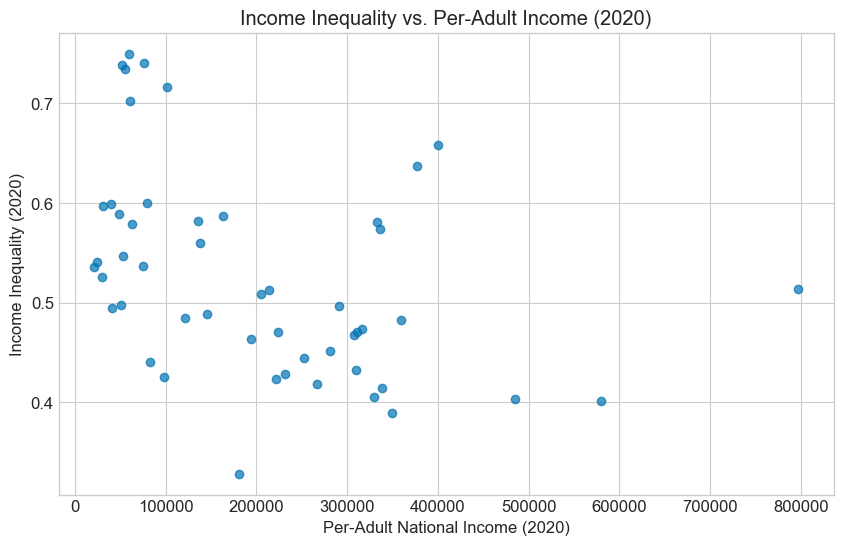

Correlation between Per-Adult Income and Income Inequality: -0.4063599832081015
                            OLS Regression Results                            
Dep. Variable:       IncomeInequality   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     9.692
Date:                Sun, 13 Apr 2025   Prob (F-statistic):            0.00309
Time:                        18:13:25   Log-Likelihood:                 48.778
No. Observations:                  51   AIC:                            -93.56
Df Residuals:                      49   BIC:                            -89.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

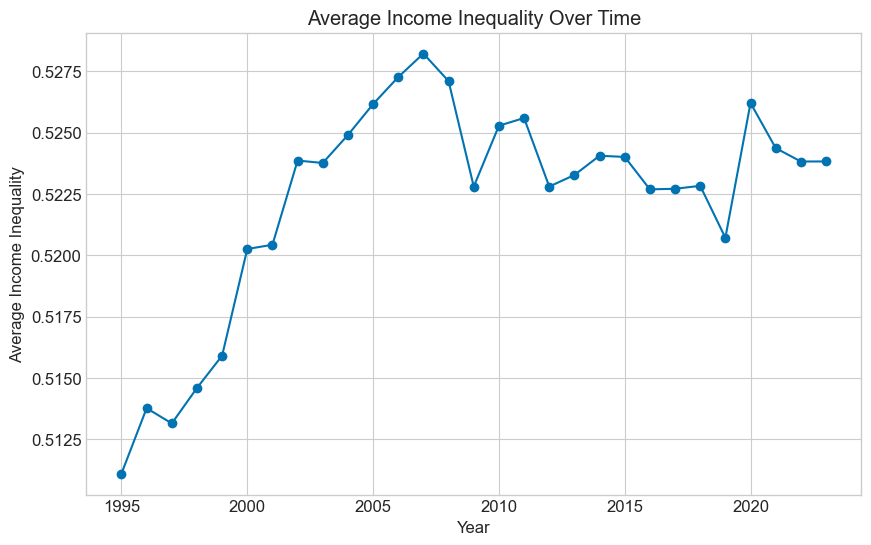

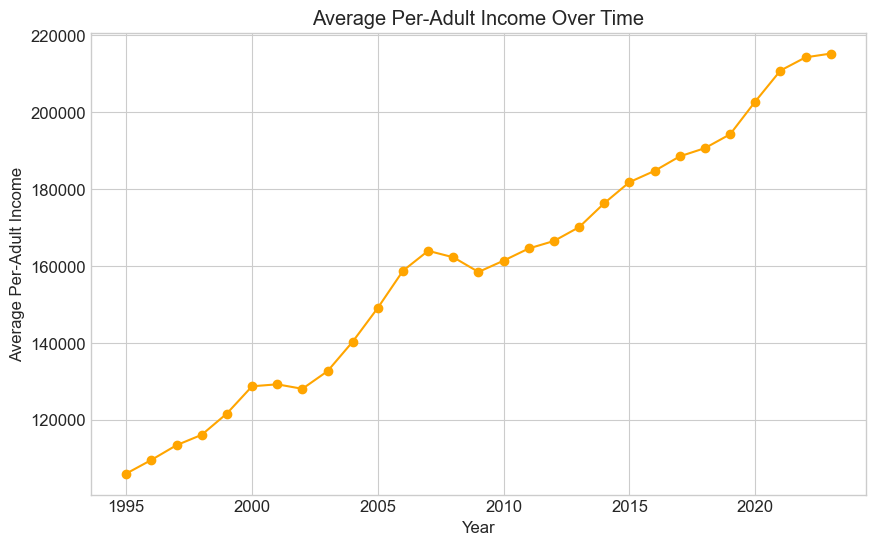

In [3]:
# 1. Scatter plot for Income Inequality vs Per-Adult Income for 2020
df_2020 = df_merged[df_merged['Year'] == 2020].copy()
plt.figure(figsize=(10, 6))
plt.scatter(df_2020['PerAdultIncome'], df_2020['IncomeInequality'], alpha=0.7)
plt.xlabel("Per-Adult National Income (2020)")
plt.ylabel("Income Inequality (2020)")
plt.title("Income Inequality vs. Per-Adult Income (2020)")
plt.grid(True)
plt.show()

# 2. Calculate Pearson correlation
corr_h1 = df_2020['PerAdultIncome'].corr(df_2020['IncomeInequality'])
print("Correlation between Per-Adult Income and Income Inequality:", corr_h1)

# 3. Regression model
X = sm.add_constant(df_2020['PerAdultIncome'])
model_h1 = sm.OLS(df_2020['IncomeInequality'], X).fit()
print(model_h1.summary())

# 4. Average Income Inequality over time
avg_inequality = df_merged.groupby("Year")["IncomeInequality"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_inequality.index, avg_inequality.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Income Inequality")
plt.title("Average Income Inequality Over Time")
plt.grid(True)
plt.show()

# 5. Average Per-Adult Income over time
avg_income = df_merged.groupby("Year")["PerAdultIncome"].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_income.index, avg_income.values, marker='o', color='orange')
plt.xlabel("Year")
plt.ylabel("Average Per-Adult Income")
plt.title("Average Per-Adult Income Over Time")
plt.grid(True)
plt.show()


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import ipywidgets as widgets
from ipywidgets import interact

# Define a function that plots the relationship for a selected year
def plot_year(year):
    # Filter the merged dataframe for the selected year.
    df_year = df_merged[df_merged['Year'] == year].copy()
    
    if df_year.empty:
        print(f"No data available for year {year}.")
        return
        
    # Scale the 'Population' column to determine dot sizes.
    population = df_year['Population']
    marker_sizes = (population / population.max()) * 300  # adjust scaling factor as needed
    
    # Create a new figure for the plot.
    plt.figure(figsize=(10, 6))
    
    # Create a bubble (scatter) plot
    plt.scatter(df_year['PerAdultIncome'], df_year['IncomeInequality'],
                s=marker_sizes, alpha=0.7, edgecolor='k', label='Data Points')
    
    # Compute the regression line if more than one point exists
    x = df_year['PerAdultIncome']
    y = df_year['IncomeInequality']
    if len(x) > 1:
        sorted_idx = np.argsort(x)
        x_sorted = x.iloc[sorted_idx]
        # Fit a line using np.polyfit
        m, b = np.polyfit(x, y, 1)
        y_fit = m * x_sorted + b
        plt.plot(x_sorted, y_fit, color='red', linewidth=2, label='Best Fit Line')
        # Calculate Pearson correlation coefficient
        corr_h1 = x.corr(y)
        annotation_text = f'Pearson Corr: {corr_h1:.2f}'
    else:
        annotation_text = "Not enough data for regression"
    
    # Annotate the plot with the Pearson correlation
    plt.text(0.05, 0.95, annotation_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    # Set labels and title.
    plt.xlabel(f"Per-Adult National Income ({year})", fontsize=14)
    plt.ylabel(f"Income Inequality ({year})", fontsize=14)
    plt.title(f"Income Inequality vs. Per-Adult Income ({year})", fontsize=16)
    
    # Enhance legend and grid appearance.
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print the Pearson correlation.
    if len(x) > 1:
        print(f"Correlation between Per-Adult Income and Income Inequality in {year}: {corr_h1}")
    else:
        print("Not enough data points to compute Pearson correlation.")
    
    # Build and print the OLS regression summary
    X = sm.add_constant(df_year['PerAdultIncome'])
    model_h1 = sm.OLS(df_year['IncomeInequality'], X).fit()
    print(model_h1.summary())

# Create an interactive slider for the year.
# The slider is set from the minimum to maximum year in the merged dataframe.
min_year = int(df_merged['Year'].min())
max_year = int(df_merged['Year'].max())

interact(plot_year, year=widgets.IntSlider(min=min_year, max=max_year, step=1, value=2020, description='Year:',  layout=widgets.Layout(width='600px')));


interactive(children=(IntSlider(value=2020, description='Year:', layout=Layout(width='600px'), max=2023, min=1…

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import ipywidgets as widgets
from ipywidgets import interact

# Function to plot boxplot and OLS for a selected year
def plot_boxplot_ols(year):
    df_year = df_merged[df_merged['Year'] == year].copy()
    
    if df_year.empty:
        print(f"No data available for year {year}.")
        return
    
    # Divide countries into bins based on PerAdultIncome
    df_year['IncomeBin'] = pd.qcut(df_year['PerAdultIncome'], q=3, labels=['Low', 'Medium', 'High'])
    
    # Compute summary stats
    group_summary = df_year.groupby('IncomeBin')['IncomeInequality'].describe()
    print(f"Summary statistics of IncomeInequality by IncomeBin ({year}):")
    print(group_summary)
    
    # Plot boxplot
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    df_year.boxplot(column='IncomeInequality', by='IncomeBin', grid=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red'),
                    whiskerprops=dict(color='blue'),
                    capprops=dict(color='blue'))
    
    plt.xlabel("Economic Development Level (Per-Adult Income Bin)", fontsize=14)
    plt.ylabel(f"Income Inequality ({year})", fontsize=14)
    plt.title(f"Income Inequality for Countries with Similar Economic Development ({year})")
    plt.suptitle("")  # Remove automatic supertitle
    plt.tight_layout()
    plt.show()
    
    # OLS Regression
    X = sm.add_constant(df_year['PerAdultIncome'])
    model = sm.OLS(df_year['IncomeInequality'], X).fit()
    print(f"\nCross-sectional OLS Regression Results ({year}):")
    print(model.summary())

# Create interactive slider for year selection
min_year = int(df_merged['Year'].min())
max_year = int(df_merged['Year'].max())

interact(plot_boxplot_ols, year=widgets.IntSlider(
    min=min_year, max=max_year, step=1, value=2020, 
    description='Year:', 
    layout=widgets.Layout(width='600px')  # Adjust slider length
));


interactive(children=(IntSlider(value=2020, description='Year:', layout=Layout(width='600px'), max=2023, min=1…